## 小车杆滑行

> **问题**：如果彼得想要逃离狼的追捕，他需要比狼移动得更快。我们将探讨彼得如何学习滑行，特别是如何通过 Q-Learning 学习保持平衡。

首先，让我们安装 gym 并导入所需的库：


In [1]:
#code block 1

## 创建一个平衡杆环境


In [ ]:
#code block 2

要了解环境如何运行，让我们进行一个100步的短模拟。


In [ ]:
#code block 3

在模拟过程中，我们需要获取观察结果以决定如何行动。实际上，`step` 函数会返回当前的观察结果、奖励函数以及 `done` 标志，该标志指示是否有必要继续模拟：


In [ ]:
#code block 4

我们可以获取这些数字的最小值和最大值：


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

让我们也探索使用分箱的其他离散化方法：


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


现在让我们运行一个简短的模拟，并观察那些离散的环境值。


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-表结构


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


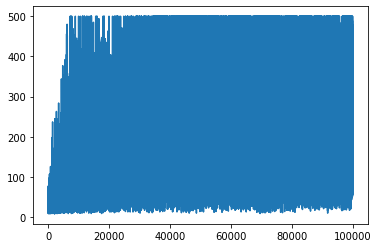

In [20]:
plt.plot(rewards)

从这个图表中无法得出任何结论，因为由于随机训练过程的性质，训练会话的长度差异很大。为了更好地理解这个图表，我们可以计算**运行平均值**，例如基于100次实验。这可以通过使用`np.convolve`方便地完成：


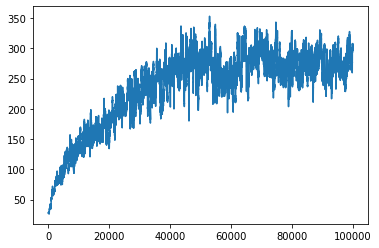

In [22]:
#code block 12

## 调整超参数并观察结果

现在，实际观察训练后的模型表现会非常有趣。让我们运行模拟，并采用与训练时相同的动作选择策略：根据 Q-Table 中的概率分布进行采样：


In [23]:
# code block 13

## 将结果保存为动画 GIF

如果你想给朋友留下深刻印象，可以考虑发送平衡杆的动画 GIF 图片。为此，我们可以调用 `env.render` 来生成图像帧，然后使用 PIL 库将这些帧保存为动画 GIF：


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**免责声明**：  
本文档使用AI翻译服务 [Co-op Translator](https://github.com/Azure/co-op-translator) 进行翻译。尽管我们努力确保翻译的准确性，但请注意，自动翻译可能包含错误或不准确之处。原始语言的文档应被视为权威来源。对于关键信息，建议使用专业人工翻译。我们不对因使用此翻译而产生的任何误解或误读承担责任。
